hola negrito
target
Target Coordinates: [-2.97698376 -0.79776908]
Defense Coordinates: [-1.76755605 -0.65999836]
Attack Coordinates: [7.6164466  4.30221114]
Defense Missile Coordinates: [-1.76755605 -0.65999836]
Defense Missile Firing Angle: 106.3538677370872
Defense Missile Firing Angle (Radians): 1.8562251642427425
Defense Missile Fired: False
Defense Missile Speed: 2
Defense Missile Fired: True


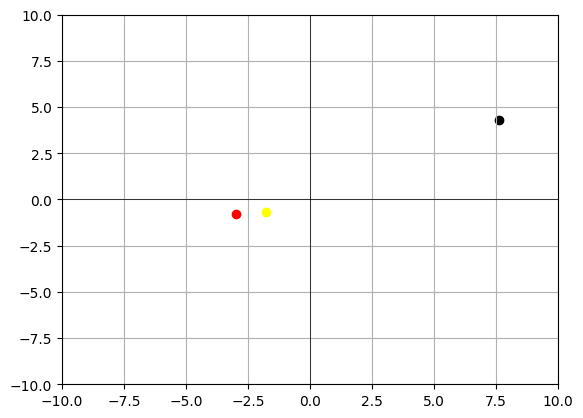

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random 
import pandas as pd
import time

# 1. Create Points
# Set seed for reproducibility
# random.seed(42) 
    
class Point: 
    def __init__(self, type):
        self.type = type
        self.coordinates = np.array([0, 0])
        self.radius = 0.2

    def create_target(self):
        x = random.uniform(-3.0, 3.0)
        y = random.uniform(-2.0, 2.0)
        self.coordinates = np.array([x, y])
        return self.coordinates
    
    def create_defense(self, target):
        x = random.uniform((target.coordinates[0] - self.radius) - 1.5, (target.coordinates[0] + self.radius) + 1.5)
        y = random.uniform((target.coordinates[1] - self.radius) - 1.5, (target.coordinates[1] + self.radius) + 1.5)
        self.coordinates = np.array([x, y])
        return self.coordinates
    
    def create_attack(self, target, defense):
        x_side_left = random.uniform(-9.5, (target.coordinates[0] - self.radius) - 2)
        x_side_right = random.uniform((target.coordinates[0] + self.radius) + 2, 9.5)
        y_below = random.uniform((target.coordinates[1] - self.radius) - 2, -9.5)
        y_above = random.uniform((target.coordinates[1] + self.radius) + 2, 9.5)
        x_inclusive = random.uniform(-9.5, 9.5)
        y_inclusive = random.uniform(-9.5, 9.5)
        y_below_x_inclusive = np.array([x_inclusive, y_below])
        y_above_x_inclusive = np.array([x_inclusive, y_above])
        x_left_y_inclusive = np.array([x_side_left, y_inclusive])
        x_right_y_inclusive = np.array([x_side_right, y_inclusive])

        self.coordinates = random.choice([y_below_x_inclusive, y_above_x_inclusive, x_left_y_inclusive, x_right_y_inclusive])
        return self.coordinates

class Missile:
    def __init__(self, type):
        self.type = type
        self.coordinates = np.array([0, 0])
        self.firing_angle = 0
        self.firing_angle_rad = 0
        self.fired = False
        self.speed = 0

    def create_defense_missile(self, defense):
        x = defense.coordinates[0]
        y = defense.coordinates[1] 
        self.coordinates = np.array([x, y])
        self.firing_angle = random.uniform(0, 360)
        self.firing_angle_rad = math.radians(self.firing_angle)
        self.speed = 2
        return self.coordinates
    
    def create_attack_missile(self, attack):
        x = attack.coordinates[0]
        y = attack.coordinates[1]
        self.coordinates = np.array([x, y])
        self.firing_angle = 0
        self.firing_angle_rad = math.radians(self.firing_angle)
        self.speed = 2
        return self.coordinates

    def fire_missile(self):
        self.fired = True
        x = self.coordinates[0] + self.speed * math.cos(self.firing_angle_rad)
        y = self.coordinates[1] + self.speed * math.sin(self.firing_angle_rad)


class GlobalTime:
    def __init__(self):
        self.start_time = None
        self.elapsed_time = 0
        self.is_running = False
    
    def start_time(self):
        self.start_time = time.time() - self.elapsed_time
        self.is_running = True

class Environment:
    def __init__(self):
        self.target = Point("target")
        self.defense = Point("defense")
        self.attack = Point("attack")
        self.time = GlobalTime()
        self.attack_missile = Missile("attack_missile")
        self.defense_missile = Missile("defense_missile")

    def create_environment(self):
        self.target.create_target()
        self.defense.create_defense(self.target)
        self.attack.create_attack(self.target, self.defense)
        self.defense_missile.create_defense_missile(self.defense)
        self.attack_missile.create_attack_missile(self.attack)
        return self.target.coordinates, self.defense.coordinates, self.attack.coordinates, self.defense_missile.coordinates, self.attack_missile.coordinates

    def start_attack(self):
        self.attack_missile.fire_missile()
        return self.attack_missile.coordinates
    

target = Point("target")
print("hola negrito")
print(target.type)
target.create_target()
print("Target Coordinates:", target.coordinates)

defense = Point("defense")
defense.create_defense(target)
print("Defense Coordinates:", defense.coordinates)

attack = Point("attack")
attack.create_attack(target, defense)
print("Attack Coordinates:", attack.coordinates)

defense_missile = Missile("defense_missile")
defense_missile.create_defense_missile(defense)
print("Defense Missile Coordinates:", defense_missile.coordinates)
print("Defense Missile Firing Angle:", defense_missile.firing_angle)
print("Defense Missile Firing Angle (Radians):", defense_missile.firing_angle_rad)
print("Defense Missile Fired:", defense_missile.fired)
print("Defense Missile Speed:", defense_missile.speed)

# Set missile fired to True
defense_missile.fire_missile() 
print("Defense Missile Fired:", defense_missile.fired)

# 2. Create the space from -10 to 10 in both axes
fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 1.1 Draw x and y axes and gridlines
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

plt.scatter(target.coordinates[0], target.coordinates[1], color='red', label='Point 1')
plt.scatter(defense.coordinates[0], defense.coordinates[1], color='yellow', label='Point 2')
plt.scatter(attack.coordinates[0], attack.coordinates[1], color='black', label='Point 3')

plt.show()

**Todo**
1. Move to origin
2. Create another point
3. Rotate
4. Move back to original position

-1.7675560484810062 -0.6599983616526792
[10, 0]


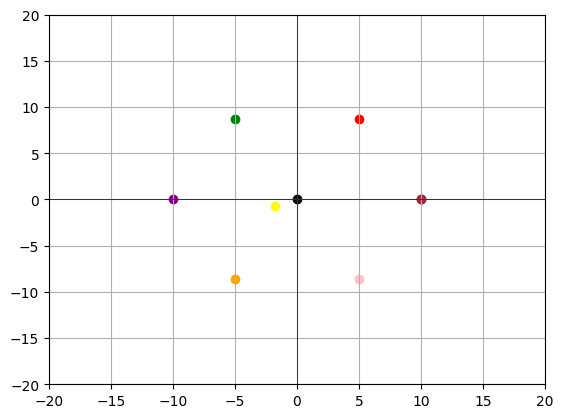

In [21]:
print(defense.coordinates[0], defense.coordinates[1])

# Move to origin
updated_defense = [0, 0]
updated_defense[0] = defense.coordinates[0] - defense.coordinates[0]
updated_defense[1] = defense.coordinates[1] - defense.coordinates[1]
# print(updated_defense)

# Create another point
other_point = [10, 0]
print(other_point)

# Rotate
def rotate_point(point, angle):
    angle = math.radians(angle)
    x = point[0] * math.cos(angle) - point[1] * math.sin(angle)
    y = point[0] * math.sin(angle) + point[1] * math.cos(angle)
    return [x, y]

new_point = rotate_point(other_point, 60)
new_point2 = rotate_point(other_point, 120)
new_point3 = rotate_point(other_point, 180)
new_point4 = rotate_point(other_point, 240)
new_point5 = rotate_point(other_point, 300)
new_point6 = rotate_point(other_point, 360)

fig, ax = plt.subplots()
plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

plt.scatter(updated_defense[0], updated_defense[1], color='black', label='Point 1')
plt.scatter(defense.coordinates[0], defense.coordinates[1], color='yellow', label='Point 2')
plt.scatter(other_point[0], other_point[1], color='blue', label='Point 3')
plt.scatter(new_point[0], new_point[1], color='red', label='Point 4')
plt.scatter(new_point2[0], new_point2[1], color='green', label='Point 5')
plt.scatter(new_point3[0], new_point3[1], color='purple', label='Point 6')
plt.scatter(new_point4[0], new_point4[1], color='orange', label='Point 7')
plt.scatter(new_point5[0], new_point5[1], color='pink', label='Point 8')
plt.scatter(new_point6[0], new_point6[1], color='brown', label='Point 9')

plt.show() 



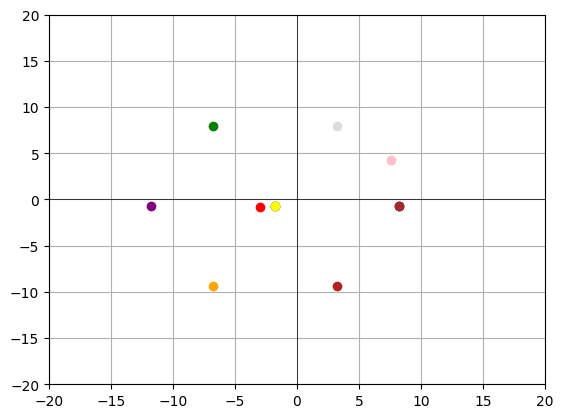

In [22]:
# Return back to original position
points = [other_point, new_point, updated_defense, new_point2, new_point3, new_point4, new_point5, new_point6]

for point in points:
    point[0] = point[0] + defense.coordinates[0]
    point[1] = point[1] + defense.coordinates[1]

fig, ax = plt.subplots()
plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)

plt.scatter(updated_defense[0], updated_defense[1], color='black', label='Point 1')
plt.scatter(defense.coordinates[0], defense.coordinates[1], color='yellow', label='Point 2')
plt.scatter(other_point[0], other_point[1], color='blue', label='Point 3')
plt.scatter(new_point[0], new_point[1], color='gainsboro', label='Point 4')
plt.scatter(new_point2[0], new_point2[1], color='green', label='Point 5')
plt.scatter(new_point3[0], new_point3[1], color='purple', label='Point 6')
plt.scatter(new_point4[0], new_point4[1], color='orange', label='Point 7')
plt.scatter(new_point5[0], new_point5[1], color='firebrick', label='Point 8')
plt.scatter(new_point6[0], new_point6[1], color='brown', label='Point 9')
plt.scatter(attack.coordinates[0], attack.coordinates[1], color='pink', label='Point 10')
plt.scatter(target.coordinates[0], target.coordinates[1], color='red', label='Point 11')


plt.show() 

